In [1]:
# import libraries

import pandas as pd
import numpy as np
import itertools

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/danie/Documents/Data Science/Institute of Data/presentation 24sep/hmeq.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
df.sample(20)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2398,0,14400,80123.0,102223.0,DebtCon,ProfExe,9.0,2.0,0.0,176.418283,0.0,30.0,27.644955
2161,0,13500,88738.0,114815.0,DebtCon,Office,9.0,0.0,0.0,239.743721,0.0,12.0,41.077118
1160,0,10000,124000.0,192000.0,HomeImp,Office,0.0,0.0,1.0,346.966667,0.0,16.0,NaN
12,1,2000,45000.0,55000.0,HomeImp,Other,3.0,0.0,0.0,86.066667,2.0,25.0,NaN
2726,0,15400,110900.0,126400.0,DebtCon,NaN,16.0,0.0,0.0,179.566667,1.0,18.0,NaN
4486,0,23400,89226.0,119604.0,DebtCon,Self,3.0,0.0,0.0,221.681383,1.0,26.0,34.556201
5042,0,26800,35485.0,74949.0,DebtCon,Mgr,14.0,0.0,0.0,84.766625,5.0,15.0,36.191459
2123,0,13300,85532.0,115800.0,HomeImp,ProfExe,11.0,0.0,1.0,175.191489,0.0,27.0,34.231394
2360,1,14300,52260.0,73000.0,DebtCon,Mgr,0.6,1.0,3.0,62.900000,0.0,17.0,NaN
912,0,9000,56930.0,67557.0,DebtCon,Other,0.0,0.0,1.0,118.699516,2.0,18.0,36.686882


In [6]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### EDA

In [7]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [8]:
df.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.048219,-0.029954,-0.060238,0.276081,0.354107,-0.170499,0.174980,-0.004157,0.199835
LOAN,-0.075099,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,-0.048219,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,-0.029954,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,-0.060238,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,0.276081,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,0.354107,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,-0.170499,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.174980,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,-0.004157,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539


In [9]:
df.groupby('BAD').mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
0,19028.107315,74829.249055,102595.921018,9.154941,0.134217,0.245133,187.002355,1.032749,21.317036,33.253129
1,16922.119428,69460.452973,98172.846227,8.027802,0.707804,1.229185,150.190183,1.782765,21.211268,39.387645


In [10]:
df.groupby('BAD').min()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,,,
0,1700,2619.0,8000.0,NaN,NaN,0.0,0.0,0.0,0.486711,0.0,0.0,0.720295
1,1100,2063.0,8800.0,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.524499


In [11]:
df.groupby('BAD').max()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,,,
0,89900,371003.0,471827.0,NaN,NaN,36.0,6.0,5.0,649.747104,11.0,56.0,45.569843
1,77400,399550.0,855909.0,NaN,NaN,41.0,10.0,15.0,1168.233561,17.0,71.0,203.312149


In [12]:
df['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

In [13]:
df[df['REASON']=='DebtCon']

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
33,1,2900,78600.0,113000.0,DebtCon,ProfExe,6.0,1.0,0.0,165.333333,2.0,26.0,NaN
37,1,2900,61962.0,70915.0,DebtCon,Mgr,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396
43,1,3000,20000.0,29750.0,DebtCon,Other,2.0,0.0,0.0,187.066667,0.0,12.0,NaN
59,1,3300,130518.0,164317.0,DebtCon,Other,9.0,0.0,6.0,192.289149,0.0,33.0,35.730559
68,1,3600,48507.0,61000.0,DebtCon,Office,13.0,1.0,4.0,97.400000,0.0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [14]:
df.groupby(by=['REASON','BAD']).mean()

LOAN       MORTDUE          VALUE        YOJ     DEROG  \
REASON  BAD                                                                   
DebtCon 0    20176.374489  75120.339505  102330.176582   8.742852  0.150862   
        1    18998.389262  73103.825899  101442.397825   8.172254  0.674319   
HomeImp 0    16946.820809  74956.810191  104168.639935  10.021028  0.099920   
        1    12720.707071  61324.880030   92194.142308   7.609595  0.707182   

               DELINQ       CLAGE      NINQ       CLNO    DEBTINC  
REASON  BAD                                                        
DebtCon 0    0.235355  180.908234  1.192425  21.938978  33.748936  
        1    1.249647  152.441828  1.951117  23.051105  40.357403  
HomeImp 0    0.258498  197.562293  0.714060  20.255193  32.868682  
        1    1.115068  145.178047  1.394958  17.214092  37.447390

In [15]:
df.groupby(by=['REASON','BAD']).min()

LOAN  MORTDUE    VALUE  YOJ  DEROG  DELINQ     CLAGE  NINQ  CLNO  \
REASON  BAD                                                                     
DebtCon 0    3900   2619.0   8000.0  0.0    0.0     0.0  0.486711   0.0   0.0   
        1    2900   4500.0   9500.0  0.0    0.0     0.0  0.000000   0.0   0.0   
HomeImp 0    1700   4810.0  23400.0  0.0    0.0     0.0  0.507115   0.0   0.0   
        1    1100   2063.0   8800.0  0.0    0.0     0.0  0.000000   0.0   0.0   

               DEBTINC  
REASON  BAD             
DebtCon 0     4.029951  
        1     0.838118  
HomeImp 0    11.652739  
        1     0.524499

In [16]:
df.groupby(by=['REASON','BAD']).max()

LOAN   MORTDUE     VALUE   YOJ  DEROG  DELINQ        CLAGE  \
REASON  BAD                                                                
DebtCon 0    89900  241931.0  301984.0  36.0    6.0     4.0   412.020547   
        1    76500  399412.0  512650.0  41.0   10.0    13.0  1168.233561   
HomeImp 0    82200  371003.0  471827.0  31.0    3.0     5.0   649.747104   
        1    77400  399550.0  855909.0  31.0   10.0    15.0   475.800000   

             NINQ  CLNO     DEBTINC  
REASON  BAD                          
DebtCon 0    11.0  52.0   43.920191  
        1    17.0  71.0  203.312149  
HomeImp 0    11.0  56.0   45.569843  
        1    14.0  57.0  143.949605

In [17]:
df.groupby(by=['BAD','REASON','JOB']).mean()

LOAN        MORTDUE          VALUE        YOJ  \
BAD REASON  JOB                                                              
0   DebtCon Mgr      21022.149123   84201.617978  106375.289474   9.382547   
            Office   18994.696970   68879.309804   96780.312500   6.907129   
            Other    20922.974036   61802.455794   86781.949693   9.707401   
            ProfExe  19983.426184   93087.435537  128021.669916   8.619829   
            Sales    14976.190476   87275.259259  121789.619048   6.986792   
            Self     36419.512195  130548.902439  179076.560976   7.219512   
    HomeImp Mgr      15305.084746   78330.737593  115008.510678   9.227966   
            Office   16920.522388   65897.657895   92287.193433  11.735537   
            Other    14072.994129   56660.921951   78509.387613  10.393607   
            ProfExe  17031.325301   99247.081325  140341.316265   8.910542   
            Sales     5800.000000   69501.000000   68965.250000   3.750000   
            Self     27380.851064   92906.845238  149464.521277   7.227273   
1   DebtCon Mgr      19923.275862   80240.646552  115403.442308   8.863158   
            Office   19409.782609   70595.511364  100250.329390   8.965761   
            Other    17758.858859   58077.646624   84135.985669   7.760749   
            ProfExe  21089.147287  103977.927419  136506.228814   9.067442   
            Sales    18188.235294   75957.794118   92922.303030   7.061765   
            Self     20381.250000   76569.266667  108193.370370   5.650000   
    HomeImp Mgr      11855.357143   71761.224490   86740.430000   8.282143   
            Office   11387.878788   47071.630000   71105.586207   7.054545   
            Other    10938.048780   45106.493506   80022.457068   6.926111   
            ProfExe  14605.479452   83517.714286  122466.220588   9.217361   
            Sales     4325.000000   97638.333333  105413.000000   8.250000   
            Self     28852.380952  104220.950000  147892.380952   7.285714   

                        DEROG    DELINQ       CLAGE      NINQ       CLNO  \
BAD REASON  JOB                                                            
0   DebtCon Mgr      0.151832  0.234414  179.203028  1.646081  23.420225   
            Office   0.060606  0.346392  179.587257  1.051485  23.013258   
            Other    0.227599  0.199647  171.000227  1.322747  19.395883   
            ProfExe  0.104294  0.247407  200.220297  0.916910  25.326211   
            Sales    0.018182  0.206349  227.072356  0.174603  23.015873   
            Self     0.024390  0.121951  198.224972  1.000000  19.707317   
    HomeImp Mgr      0.070000  0.564815  188.321009  0.472222  19.830508   
            Office   0.084034  0.169355  188.823871  0.421260  18.914179   
            Other    0.145652  0.285403  202.190793  0.943277  19.471058   
            ProfExe  0.009259  0.256024  209.613605  0.651235  22.602410   
            Sales    1.625000  0.000000  159.964610  0.500000  22.500000   
            Self     0.159574  0.000000  177.498642  1.159420  24.000000   
1   DebtCon Mgr      0.956140  1.271930  146.791449  2.079646  23.534483   
            Office   0.469880  1.558140  138.171649  1.954545  20.488636   
            Other    0.563107  1.148734  150.057130  1.981132  21.034161   
            ProfExe  0.701613  1.404762  174.842451  1.873016  27.396825   
            Sales    0.875000  0.566667  152.000930  1.939394  28.058824   
            Self     0.586207  1.483871  147.821700  1.500000  26.875000   
    HomeImp Mgr      0.600000  1.519231  134.204602  1.480769  20.903846   
            Office   1.275862  1.766667  190.618420  0.740741  18.300000   
            Other    0.656085  0.794737  129.498015  1.361702  14.222798   
            ProfExe  0.735294  1.179104  173.708747  1.484375  20.985294   
            Sales    0.500000  0.000000  133.731617  0.500000  32.000000   
            Self     0.333333  2.444444  172.032554  2.611111  19.222222   

                       

In [18]:
df.groupby(by=['BAD','JOB']).mean()

LOAN        MORTDUE          VALUE        YOJ     DEROG  \
BAD JOB                                                                        
0   Mgr      19744.217687   83681.556720  109056.456224   9.546043  0.133470   
    Office   18271.810450   67113.320261   94276.826051   8.332868  0.070151   
    Other    18882.715376   60651.747596   85400.353397  10.045754  0.201474   
    ProfExe  19045.676692   95086.516471  131558.766917   8.696084  0.072727   
    Sales    13942.253521   84981.806452  115837.577465   6.562295  0.222222   
    Self     30125.925926  105253.440000  158457.807407   7.224806  0.118519   
1   Mgr      17220.670391   77724.232558  107064.425466   8.607345  0.918129   
    Office   17292.000000   64467.441429   92635.937027   8.461200  0.678571   
    Other    15343.682310   54933.374824   82600.797276   7.614841  0.599222   
    ProfExe  18671.226415   94304.098039  128714.312821   9.031517  0.732673   
    Sales    16728.947368   77715.675676   94272.648649   7.186842  0.833333   
    Self     24098.275862   87327.890909  127513.358491   6.698148  0.538462   

               DELINQ       CLAGE      NINQ       CLNO    DEBTINC  
BAD JOB                                                            
0   Mgr      0.370937  183.136493  1.379374  22.748700  34.879350  
    Office   0.276316  183.350830  0.823155  21.371810  34.057286  
    Other    0.218750  182.560262  1.190844  19.409692  33.850546  
    ProfExe  0.246817  202.633082  0.840820  24.436069  31.986818  
    Sales    0.183099  219.510919  0.211268  22.957746  34.327199  
    Self     0.040323  183.793305  1.100000  22.696296  32.791709  
1   Mgr      1.416185  145.115841  1.923529  23.337143  38.976402  
    Office   1.612069  151.853415  1.669565  19.932203  38.550199  
    Other    1.051724  142.325697  1.749042  18.730697  37.719429  
    ProfExe  1.270936  173.739341  1.710000  24.848039  39.974741  
    Sales    0.500000  150.077844  1.783784  28.473684  50.163154  
    Self     1.814815  151.393524  1.872727  23.836364  53.540875

### Clean data

In [19]:
df[(df['MORTDUE'].isna()) & (df['VALUE'].isna()) & (df['YOJ'].isna()) & (df['DEROG'].isna()) & (df['DELINQ'].isna()) 
   & (df['CLAGE'].isna()) & (df['NINQ'].isna()) & (df['CLNO'].isna()) & (df['DEBTINC'].isna())]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1144,1,10000,NaN,NaN,HomeImp,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1405,0,10800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,1,11300,NaN,NaN,HomeImp,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.drop([3,1405], inplace=True) # obs with null values across features

In [21]:
df.REASON.unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [22]:
df[df['REASON'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
10,1,2000,22608.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
13,0,2000,64536.0,87400.0,NaN,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,NaN
17,1,2200,23030.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
51,0,3100,NaN,70400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,0,3800,NaN,73189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.253949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,1,32000,92400.0,215000.0,NaN,Self,2.5,1.0,3.0,165.333333,1.0,40.0,NaN
5468,1,32900,NaN,55657.0,NaN,NaN,1.0,1.0,3.0,210.012265,10.0,15.0,1.909225
5803,1,49500,247500.0,NaN,NaN,Other,0.0,0.0,4.0,160.333333,2.0,25.0,NaN
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


In [23]:
df['REASON'].fillna('Nil', inplace = True)

In [24]:
df[df['REASON'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [25]:
df.JOB.unique()

array(['Other', 'Office', 'Sales', nan, 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [26]:
## assume JOB is nil if YOJ is NaN and JOB is Other if YOJ is not NaN

In [27]:
df[df['JOB'].isna() & df['YOJ'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
51,0,3100,NaN,70400.0,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,0,3800,NaN,73189.0,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.253949
112,0,4400,NaN,60250.0,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,0,4500,NaN,77182.0,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.227253
139,0,4900,NaN,28437.5,HomeImp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,0,24300,NaN,144123.0,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.529230
4660,0,24500,NaN,149489.0,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.443486
4680,0,24600,NaN,146804.0,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.263535
4880,0,25600,NaN,147598.0,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.461987


In [28]:
df['JOB'].fillna('Nil', inplace=True)

In [29]:
df['JOB'].unique()

array(['Other', 'Office', 'Sales', 'Nil', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [30]:
df[(df['JOB']=='Nil') & (df['YOJ'].notna())]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
10,1,2000,22608.0,NaN,Nil,Nil,18.0,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,NaN,Nil,Nil,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
27,1,2500,15000.0,20200.0,HomeImp,Nil,18.0,0.0,0.0,136.066667,1.0,19.0,NaN
92,0,4000,NaN,45760.0,HomeImp,Nil,0.0,0.0,0.0,NaN,0.0,0.0,NaN
105,0,4200,44000.0,55085.0,DebtCon,Nil,6.0,NaN,1.0,75.433333,NaN,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,0,81200,18834.0,108355.0,HomeImp,Nil,28.0,0.0,0.0,139.136329,0.0,14.0,34.042153
5944,0,81400,22344.0,108280.0,HomeImp,Nil,25.0,0.0,0.0,148.114994,0.0,14.0,34.285741
5945,0,81400,21041.0,111304.0,HomeImp,Nil,26.0,0.0,0.0,146.322783,0.0,14.0,32.131373
5946,0,82200,16097.0,111287.0,HomeImp,Nil,26.0,0.0,0.0,142.119979,0.0,14.0,31.743472


In [31]:
df['JOB'].mask((df['YOJ'].notna()) & (df['JOB'] == 'Nil'), 'Other', inplace=True)

In [32]:
df['JOB'][5947]

'Other'

In [33]:
df['YOJ'][5947]

26.0

In [34]:
df['JOB'][4947]

'Nil'

In [35]:
df['YOJ'][4947]

nan

In [36]:
df[(df['YOJ'].isna())]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
15,1,2200,24280.0,34687.0,HomeImp,Other,NaN,0.0,1.0,300.866667,0.0,8.0,NaN
24,1,2400,NaN,17180.0,HomeImp,Other,NaN,0.0,0.0,14.566667,3.0,4.0,NaN
29,0,2500,7229.0,44516.0,HomeImp,Self,NaN,0.0,0.0,208.000000,0.0,12.0,NaN
51,0,3100,NaN,70400.0,Nil,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,1,3200,27200.0,40834.0,HomeImp,Other,NaN,0.0,0.0,298.131564,0.0,7.0,35.553539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,0,51500,NaN,90003.0,HomeImp,Other,NaN,0.0,0.0,347.802514,0.0,7.0,25.324002
5862,0,52200,NaN,90240.0,HomeImp,Other,NaN,0.0,0.0,341.828812,0.0,7.0,24.016671
5865,0,52300,NaN,84584.0,HomeImp,Other,NaN,1.0,0.0,350.920996,0.0,7.0,24.355304
5880,0,53700,NaN,84205.0,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.639940


In [37]:
df['YOJ'].fillna(99, inplace = True)

In [38]:
df[df['YOJ']==99]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
15,1,2200,24280.0,34687.0,HomeImp,Other,99.0,0.0,1.0,300.866667,0.0,8.0,NaN
24,1,2400,NaN,17180.0,HomeImp,Other,99.0,0.0,0.0,14.566667,3.0,4.0,NaN
29,0,2500,7229.0,44516.0,HomeImp,Self,99.0,0.0,0.0,208.000000,0.0,12.0,NaN
51,0,3100,NaN,70400.0,Nil,Nil,99.0,NaN,NaN,NaN,NaN,NaN,NaN
54,1,3200,27200.0,40834.0,HomeImp,Other,99.0,0.0,0.0,298.131564,0.0,7.0,35.553539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,0,51500,NaN,90003.0,HomeImp,Other,99.0,0.0,0.0,347.802514,0.0,7.0,25.324002
5862,0,52200,NaN,90240.0,HomeImp,Other,99.0,0.0,0.0,341.828812,0.0,7.0,24.016671
5865,0,52300,NaN,84584.0,HomeImp,Other,99.0,1.0,0.0,350.920996,0.0,7.0,24.355304
5880,0,53700,NaN,84205.0,HomeImp,Other,99.0,0.0,0.0,339.665615,0.0,7.0,22.639940


In [39]:
df[(df['JOB']!= 'NIL') & (df['YOJ'] ==99)]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
15,1,2200,24280.0,34687.0,HomeImp,Other,99.0,0.0,1.0,300.866667,0.0,8.0,NaN
24,1,2400,NaN,17180.0,HomeImp,Other,99.0,0.0,0.0,14.566667,3.0,4.0,NaN
29,0,2500,7229.0,44516.0,HomeImp,Self,99.0,0.0,0.0,208.000000,0.0,12.0,NaN
51,0,3100,NaN,70400.0,Nil,Nil,99.0,NaN,NaN,NaN,NaN,NaN,NaN
54,1,3200,27200.0,40834.0,HomeImp,Other,99.0,0.0,0.0,298.131564,0.0,7.0,35.553539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,0,51500,NaN,90003.0,HomeImp,Other,99.0,0.0,0.0,347.802514,0.0,7.0,25.324002
5862,0,52200,NaN,90240.0,HomeImp,Other,99.0,0.0,0.0,341.828812,0.0,7.0,24.016671
5865,0,52300,NaN,84584.0,HomeImp,Other,99.0,1.0,0.0,350.920996,0.0,7.0,24.355304
5880,0,53700,NaN,84205.0,HomeImp,Other,99.0,0.0,0.0,339.665615,0.0,7.0,22.639940


In [40]:
df['YOJ'].mask(((df['YOJ']==99) & (df['JOB'] != 'Nil')), 1, inplace=True)

In [41]:
df[(df['YOJ'] ==99) & (df['JOB']!='Nil')]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [42]:
df['YOJ'].mask(((df['YOJ']==99) & (df['JOB'] == 'Nil')), 0, inplace=True)

In [43]:
## MORTDUE and Value(property valuation)

In [44]:
df[(df['VALUE'].isna()) & (df['MORTDUE'].isna())]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
309,1,6000,NaN,NaN,HomeImp,Office,13.00,NaN,2.0,122.766667,NaN,23.0,NaN
351,1,6200,NaN,NaN,DebtCon,Self,3.00,NaN,NaN,80.500000,2.0,17.0,NaN
572,1,7500,NaN,NaN,HomeImp,Other,21.00,NaN,NaN,158.900000,1.0,21.0,NaN
589,1,7500,NaN,NaN,HomeImp,Other,20.00,NaN,NaN,157.328423,0.0,20.0,NaN
1144,1,10000,NaN,NaN,HomeImp,Other,1.00,NaN,NaN,NaN,NaN,NaN,NaN
1198,1,10000,NaN,NaN,Nil,Other,15.00,2.0,2.0,108.933333,3.0,31.0,NaN
1507,0,11100,NaN,NaN,Nil,Nil,0.00,NaN,NaN,NaN,NaN,NaN,26.232459
1553,1,11300,NaN,NaN,HomeImp,Other,1.00,NaN,NaN,NaN,NaN,NaN,NaN
1714,1,12000,NaN,NaN,HomeImp,Other,3.00,0.0,2.0,213.666667,1.0,15.0,NaN
1738,1,12000,NaN,NaN,HomeImp,Other,19.00,0.0,8.0,195.833333,0.0,13.0,NaN


In [45]:
# Assume no mortgage as property owner may not need a mortgage
df['MORTDUE'].fillna(0, inplace=True)

In [46]:
df[(df['MORTDUE']==0) & (df['VALUE'].isna())]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
309,1,6000,0.0,NaN,HomeImp,Office,13.00,NaN,2.0,122.766667,NaN,23.0,NaN
351,1,6200,0.0,NaN,DebtCon,Self,3.00,NaN,NaN,80.500000,2.0,17.0,NaN
572,1,7500,0.0,NaN,HomeImp,Other,21.00,NaN,NaN,158.900000,1.0,21.0,NaN
589,1,7500,0.0,NaN,HomeImp,Other,20.00,NaN,NaN,157.328423,0.0,20.0,NaN
1144,1,10000,0.0,NaN,HomeImp,Other,1.00,NaN,NaN,NaN,NaN,NaN,NaN
1198,1,10000,0.0,NaN,Nil,Other,15.00,2.0,2.0,108.933333,3.0,31.0,NaN
1507,0,11100,0.0,NaN,Nil,Nil,0.00,NaN,NaN,NaN,NaN,NaN,26.232459
1553,1,11300,0.0,NaN,HomeImp,Other,1.00,NaN,NaN,NaN,NaN,NaN,NaN
1714,1,12000,0.0,NaN,HomeImp,Other,3.00,0.0,2.0,213.666667,1.0,15.0,NaN
1738,1,12000,0.0,NaN,HomeImp,Other,19.00,0.0,8.0,195.833333,0.0,13.0,NaN


In [47]:
df['VALUE'].fillna(0, inplace=True)

In [48]:
df[(df['MORTDUE']>0) & (df['VALUE']==0)]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
10,1,2000,22608.0,0.0,Nil,Other,18.0,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,0.0,Nil,Other,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
23,1,2400,18000.0,0.0,HomeImp,Mgr,22.0,NaN,2.0,121.733333,0.0,10.0,NaN
57,1,3200,23159.0,0.0,HomeImp,Mgr,20.0,NaN,2.0,117.805748,0.0,9.0,0.524499
119,1,4500,57000.0,0.0,HomeImp,Other,5.0,NaN,NaN,222.600000,1.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,50000,26976.0,0.0,DebtCon,Mgr,8.3,1.0,0.0,111.600000,1.0,6.0,NaN
5818,1,50000,106000.0,0.0,DebtCon,Mgr,0.8,0.0,2.0,252.633333,3.0,32.0,NaN
5822,1,50000,30338.0,0.0,DebtCon,Mgr,8.0,0.0,0.0,91.431005,0.0,5.0,35.084001
5826,1,50100,256431.0,0.0,Nil,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


In [49]:
## Assume property value = Nan to be property value = mortdue  
df['VALUE'].mask(((df['VALUE']==0) & (df['MORTDUE'] >0)), df['MORTDUE'], inplace = True)

In [50]:
df['VALUE'][10]

22608.0

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5958 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5958 non-null   int64  
 1   LOAN     5958 non-null   int64  
 2   MORTDUE  5958 non-null   float64
 3   VALUE    5958 non-null   float64
 4   REASON   5958 non-null   object 
 5   JOB      5958 non-null   object 
 6   YOJ      5958 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 811.7+ KB


In [52]:
df[(df['DEROG'].isnull()) & (df['BAD']==0)]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
48,0,3000,58000.0,71500.0,HomeImp,Mgr,10.0,NaN,2.0,211.933333,0.0,25.0,NaN
51,0,3100,0.0,70400.0,Nil,Nil,0.0,NaN,NaN,NaN,NaN,NaN,NaN
52,0,3200,67848.0,74566.0,HomeImp,Mgr,10.0,NaN,1.0,206.426602,0.0,25.0,40.115677
66,0,3600,61327.0,76484.0,HomeImp,Mgr,9.0,NaN,2.0,202.510775,0.0,25.0,41.516390
73,0,3800,0.0,73189.0,Nil,Nil,0.0,NaN,NaN,NaN,NaN,NaN,22.253949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,0,42500,104027.0,158425.0,DebtCon,Other,14.0,NaN,0.0,224.601376,3.0,31.0,42.683751
5733,0,42800,100919.0,158981.0,DebtCon,Other,14.0,NaN,1.0,221.117818,4.0,30.0,42.581615
5735,0,42900,101731.0,155688.0,DebtCon,Other,14.0,NaN,1.0,235.352057,3.0,30.0,43.181424
5763,0,44400,100564.0,154708.0,DebtCon,Other,14.0,NaN,0.0,253.914111,3.0,30.0,43.902152


In [53]:
df[(df['DEROG'].isnull()) & (df['BAD']==1)]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
10,1,2000,22608.0,22608.0,Nil,Other,18.0,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,23030.0,Nil,Other,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
23,1,2400,18000.0,18000.0,HomeImp,Mgr,22.0,NaN,2.0,121.733333,0.0,10.0,NaN
57,1,3200,23159.0,23159.0,HomeImp,Mgr,20.0,NaN,2.0,117.805748,0.0,9.0,0.524499
63,1,3600,61584.0,61800.0,HomeImp,ProfExe,10.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562,1,36000,124000.0,176000.0,DebtCon,Other,21.0,NaN,NaN,257.700000,5.0,35.0,NaN
5594,1,37000,93378.0,145000.0,DebtCon,Sales,15.0,NaN,2.0,368.700000,1.0,27.0,NaN
5673,1,40400,83786.0,131000.0,DebtCon,Office,34.0,NaN,13.0,210.600000,3.0,36.0,NaN
5820,1,50000,80286.0,145000.0,DebtCon,Other,12.0,NaN,1.0,178.766599,0.0,35.0,NaN


In [54]:
## Assume replace null values for DEROG (Number of major derogatory reports) is 0 for non-default and 1 for default

In [55]:
df['DEROG'].fillna(99, inplace = True)

In [56]:
df[(df['BAD']==1) & (df['DEROG']==99)]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
10,1,2000,22608.0,22608.0,Nil,Other,18.0,99.0,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,23030.0,Nil,Other,19.0,99.0,NaN,NaN,NaN,NaN,3.711312
23,1,2400,18000.0,18000.0,HomeImp,Mgr,22.0,99.0,2.0,121.733333,0.0,10.0,NaN
57,1,3200,23159.0,23159.0,HomeImp,Mgr,20.0,99.0,2.0,117.805748,0.0,9.0,0.524499
63,1,3600,61584.0,61800.0,HomeImp,ProfExe,10.0,99.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562,1,36000,124000.0,176000.0,DebtCon,Other,21.0,99.0,NaN,257.700000,5.0,35.0,NaN
5594,1,37000,93378.0,145000.0,DebtCon,Sales,15.0,99.0,2.0,368.700000,1.0,27.0,NaN
5673,1,40400,83786.0,131000.0,DebtCon,Office,34.0,99.0,13.0,210.600000,3.0,36.0,NaN
5820,1,50000,80286.0,145000.0,DebtCon,Other,12.0,99.0,1.0,178.766599,0.0,35.0,NaN


In [57]:
df[(df['BAD']==0) & (df['DEROG']==99)]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
48,0,3000,58000.0,71500.0,HomeImp,Mgr,10.0,99.0,2.0,211.933333,0.0,25.0,NaN
51,0,3100,0.0,70400.0,Nil,Nil,0.0,99.0,NaN,NaN,NaN,NaN,NaN
52,0,3200,67848.0,74566.0,HomeImp,Mgr,10.0,99.0,1.0,206.426602,0.0,25.0,40.115677
66,0,3600,61327.0,76484.0,HomeImp,Mgr,9.0,99.0,2.0,202.510775,0.0,25.0,41.516390
73,0,3800,0.0,73189.0,Nil,Nil,0.0,99.0,NaN,NaN,NaN,NaN,22.253949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,0,42500,104027.0,158425.0,DebtCon,Other,14.0,99.0,0.0,224.601376,3.0,31.0,42.683751
5733,0,42800,100919.0,158981.0,DebtCon,Other,14.0,99.0,1.0,221.117818,4.0,30.0,42.581615
5735,0,42900,101731.0,155688.0,DebtCon,Other,14.0,99.0,1.0,235.352057,3.0,30.0,43.181424
5763,0,44400,100564.0,154708.0,DebtCon,Other,14.0,99.0,0.0,253.914111,3.0,30.0,43.902152


In [58]:
df['DEROG'].mask(((df['DEROG']==99) & (df['BAD']==1)), 1, inplace = True)

In [59]:
df['DEROG'].mask(((df['DEROG']==99) & (df['BAD']==0)), 0, inplace = True)

In [60]:
df['DEROG'].unique()

array([ 0.,  3.,  1.,  2.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [61]:
## Assume replace null values for DELINQ (Number of delinquent credit lines) is 0 for non-default and 1 for default
df[df['DELINQ'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
10,1,2000,22608.0,22608.0,Nil,Other,18.0,1.0,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,23030.0,Nil,Other,19.0,1.0,NaN,NaN,NaN,NaN,3.711312
51,0,3100,0.0,70400.0,Nil,Nil,0.0,0.0,NaN,NaN,NaN,NaN,NaN
63,1,3600,61584.0,61800.0,HomeImp,ProfExe,10.0,1.0,NaN,NaN,NaN,NaN,NaN
73,0,3800,0.0,73189.0,Nil,Nil,0.0,0.0,NaN,NaN,NaN,NaN,22.253949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,0,50900,42541.0,68483.0,DebtCon,Office,5.0,1.0,NaN,181.390336,1.0,15.0,30.909713
5848,0,51000,39609.0,60837.0,DebtCon,Office,5.0,0.0,NaN,178.888671,0.0,16.0,30.841045
5853,0,51500,42041.0,67770.0,DebtCon,Office,6.0,0.0,NaN,205.656576,1.0,16.0,31.029003
5855,0,51600,38900.0,63292.0,DebtCon,Office,6.0,1.0,NaN,182.520896,1.0,15.0,32.823121


In [62]:
df[(df['DELINQ'].isna()) & (df['REASON']=='DebtCon')]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
171,0,5000,70470.0,77908.0,DebtCon,Other,5.0,0.0,NaN,NaN,NaN,NaN,NaN
173,0,5000,74225.0,89640.0,DebtCon,ProfExe,0.3,0.0,NaN,NaN,NaN,NaN,NaN
217,0,5300,73698.0,84427.0,DebtCon,Other,4.0,0.0,NaN,NaN,NaN,NaN,19.131201
226,0,5300,83552.0,96809.0,DebtCon,ProfExe,0.0,0.0,NaN,NaN,NaN,NaN,28.423962
251,0,5500,78059.0,78179.0,DebtCon,Other,5.0,0.0,NaN,NaN,NaN,NaN,20.679314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,0,50900,42541.0,68483.0,DebtCon,Office,5.0,1.0,NaN,181.390336,1.0,15.0,30.909713
5848,0,51000,39609.0,60837.0,DebtCon,Office,5.0,0.0,NaN,178.888671,0.0,16.0,30.841045
5853,0,51500,42041.0,67770.0,DebtCon,Office,6.0,0.0,NaN,205.656576,1.0,16.0,31.029003
5855,0,51600,38900.0,63292.0,DebtCon,Office,6.0,1.0,NaN,182.520896,1.0,15.0,32.823121


In [63]:
df[(df['BAD']==1) & (df['REASON']=='DebtCon')]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
33,1,2900,78600.0,113000.0,DebtCon,ProfExe,6.0,1.0,0.0,165.333333,2.0,26.0,NaN
37,1,2900,61962.0,70915.0,DebtCon,Mgr,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396
43,1,3000,20000.0,29750.0,DebtCon,Other,2.0,0.0,0.0,187.066667,0.0,12.0,NaN
59,1,3300,130518.0,164317.0,DebtCon,Other,9.0,0.0,6.0,192.289149,0.0,33.0,35.730559
68,1,3600,48507.0,61000.0,DebtCon,Office,13.0,1.0,4.0,97.400000,0.0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,1,63300,202000.0,281000.0,DebtCon,ProfExe,2.0,0.0,0.0,99.433333,2.0,21.0,NaN
5912,1,65500,205156.0,290239.0,DebtCon,ProfExe,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001
5930,1,72300,0.0,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN
5931,1,75400,0.0,89609.0,DebtCon,Other,1.0,0.0,0.0,115.763534,9.0,23.0,41.105569


In [64]:
df['DELINQ'].fillna(99, inplace = True)

In [65]:
df['DELINQ'].mask(((df['BAD']==0) & (df['DELINQ']==99)),0, inplace = True)

In [66]:
df['DELINQ'].mask(((df['BAD']==1) & (df['DELINQ']==99)),1, inplace = True)

In [67]:
df[df['DELINQ']==99]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [68]:
## Age of oldest credit line in months. Assume means of CLAGE where BAD is 0 & 1 respectively for null values
df['CLAGE'].value_counts()

102.500000    7
206.966667    7
109.566667    6
95.366667     6
123.766667    6
             ..
163.283933    1
165.077847    1
239.457118    1
81.133333     1
123.000000    1
Name: CLAGE, Length: 5314, dtype: int64

In [69]:
df['CLAGE'].where(df['BAD'] == 0).value_counts()

206.966667    5
179.566667    5
107.533333    4
219.133333    4
102.500000    4
             ..
108.019142    1
254.356020    1
126.912723    1
167.361030    1
193.366667    1
Name: CLAGE, Length: 4450, dtype: int64

In [70]:
df['CLAGE'].where(df['BAD'] == 1).value_counts()

177.500000    6
165.333333    5
80.100000     4
90.300000     4
123.766667    4
             ..
81.133333     1
280.343720    1
178.659589    1
36.766667     1
123.000000    1
Name: CLAGE, Length: 975, dtype: int64

In [71]:
df['CLAGE'].mode()

0    102.500000
1    206.966667
dtype: float64

In [72]:
df['CLAGE'].where(df['BAD'] == 0).mode()

0    179.566667
1    206.966667
dtype: float64

In [73]:
clage1 = df['CLAGE'].where(df['BAD'] == 1).mode()

In [74]:
df.groupby('BAD').median()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
0,16900,62941.0,90599.5,6.0,0.0,0.0,180.415787,1.0,20.0,34.541671
1,14950,56624.5,80400.0,5.0,0.0,1.0,132.866667,1.0,20.0,38.079762


In [75]:
df.groupby('BAD').mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
0,19029.832285,68381.697407,102466.869545,8.367820,0.116771,0.219078,187.002355,1.032749,21.317036,33.253129
1,16935.101010,63321.271524,94846.372315,7.644992,0.728956,1.215488,150.190183,1.782765,21.211268,39.387645


In [76]:
clage0 =df['CLAGE'].where(df['BAD']==0).mean()

In [77]:
clage1 =df['CLAGE'].where(df['BAD']==1).mean()

In [78]:
clage1

150.19018340812843

In [79]:
df['CLAGE'].fillna(999, inplace = True)

In [80]:
df['CLAGE'].mask(((df['BAD']==0) & (df['CLAGE']==999)), clage0, inplace = True)

In [81]:
df['CLAGE'].mask(((df['BAD']==1) & (df['CLAGE']==999)), clage1, inplace = True)

In [82]:
df[df['CLAGE']==999]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [83]:
df['CLAGE'].isna().sum()

0

In [84]:
# Number of recent credit inquiries - assume 0 for null values

df['NINQ'].where(df['BAD']==0).value_counts()

0.0     2135
1.0     1085
2.0      599
3.0      285
4.0       95
5.0       39
7.0       29
6.0       27
10.0      19
8.0       11
11.0       7
9.0        5
Name: NINQ, dtype: int64

In [85]:
df['NINQ'].where(df['BAD']==1).value_counts()

0.0     396
1.0     254
2.0     181
3.0     107
4.0      61
5.0      36
6.0      29
7.0      15
8.0      11
10.0      9
9.0       6
11.0      3
13.0      2
12.0      2
17.0      1
14.0      1
Name: NINQ, dtype: int64

In [86]:
df['NINQ'].fillna(0, inplace = True)

In [87]:
# Number of credit lines - assume mode of BAD 0/1 to replace null values respectively

df['CLNO'].where(df['BAD']==1).value_counts()

23.0    60
14.0    50
19.0    50
21.0    46
16.0    43
        ..
44.0     1
63.0     1
57.0     1
55.0     1
52.0     1
Name: CLNO, Length: 61, dtype: int64

In [88]:
df['CLNO'].where(df['BAD']==0).value_counts()

16.0    273
19.0    257
24.0    235
23.0    199
25.0    192
20.0    191
21.0    189
18.0    184
15.0    182
22.0    175
17.0    171
26.0    170
13.0    169
12.0    158
14.0    154
11.0    125
27.0    109
10.0    109
30.0     96
9.0      94
29.0     92
32.0     91
31.0     87
34.0     73
28.0     71
35.0     62
7.0      62
8.0      61
36.0     51
6.0      46
33.0     43
37.0     42
0.0      37
42.0     35
38.0     32
4.0      31
5.0      30
50.0     29
49.0     29
47.0     22
3.0      21
41.0     19
43.0     18
46.0     16
55.0     13
51.0     11
39.0     10
40.0     10
56.0      6
45.0      6
48.0      6
52.0      4
44.0      3
1.0       1
Name: CLNO, dtype: int64

In [89]:
clno0 = df['CLNO'].where(df['BAD'] == 0).mode()
clno0

0    16.0
dtype: float64

In [90]:
clno1 = df['CLNO'].where(df['BAD'] == 1).mode()
clno1

0    23.0
dtype: float64

In [91]:
df['CLNO'].fillna(999, inplace = True)

In [92]:
df['CLNO'].isna().sum()

0

In [93]:
df[df['CLNO'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [94]:
df[df['CLNO']==999]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
10,1,2000,22608.0,22608.0,Nil,Other,18.0,1.0,1.0,150.190183,0.0,999.0,NaN
17,1,2200,23030.0,23030.0,Nil,Other,19.0,1.0,1.0,150.190183,0.0,999.0,3.711312
51,0,3100,0.0,70400.0,Nil,Nil,0.0,0.0,0.0,187.002355,0.0,999.0,NaN
63,1,3600,61584.0,61800.0,HomeImp,ProfExe,10.0,1.0,1.0,150.190183,0.0,999.0,NaN
73,0,3800,0.0,73189.0,Nil,Nil,0.0,0.0,0.0,187.002355,0.0,999.0,22.253949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,0,24600,0.0,146804.0,Nil,Nil,0.0,0.0,0.0,187.002355,0.0,999.0,17.263535
4789,0,25100,85337.0,104607.0,HomeImp,Other,6.0,0.0,0.0,187.002355,0.0,999.0,27.950475
4880,0,25600,0.0,147598.0,Nil,Nil,0.0,0.0,0.0,187.002355,0.0,999.0,14.461987
4899,0,25700,85417.0,98179.0,HomeImp,Other,7.0,0.0,0.0,187.002355,0.0,999.0,30.829477


In [95]:
df['CLNO'].mask(((df['BAD']==0) & (df['CLNO']==999)), 16.0, inplace = True)

In [96]:
df[df['CLNO'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [97]:
df['CLNO'].mask(((df['BAD']==1) & (df['CLNO']==999)), 23.0, inplace = True)

In [98]:
df[df['CLNO'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5958 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5958 non-null   int64  
 1   LOAN     5958 non-null   int64  
 2   MORTDUE  5958 non-null   float64
 3   VALUE    5958 non-null   float64
 4   REASON   5958 non-null   object 
 5   JOB      5958 non-null   object 
 6   YOJ      5958 non-null   float64
 7   DEROG    5958 non-null   float64
 8   DELINQ   5958 non-null   float64
 9   CLAGE    5958 non-null   float64
 10  NINQ     5958 non-null   float64
 11  CLNO     5958 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 811.7+ KB


In [100]:
## Debt-to-income ratio

df[df['DEBTINC'].isna()]  

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,1,72300,0.0,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN
5932,1,76500,38206.0,90000.0,DebtCon,Other,12.0,0.0,0.0,134.900000,0.0,26.0,NaN
5933,1,77200,83962.0,215000.0,HomeImp,Self,8.0,1.0,2.0,71.533132,3.0,14.0,NaN
5935,0,78400,13900.0,102910.0,HomeImp,Other,27.0,0.0,1.0,138.000000,0.0,14.0,NaN


In [101]:
tmp = df[df['DEBTINC'].notna()].groupby(by=['BAD', 'REASON', 'JOB']).mean()

In [102]:
tmp

LOAN        MORTDUE          VALUE        YOJ  \
BAD REASON  JOB                                                              
0   DebtCon Mgr      21258.252427   82956.308252  106845.157767   8.713592   
            Office   19164.000000   66885.492632   97049.934737   6.656842   
            Other    20457.096774   57679.303226   86930.661290   8.464516   
            ProfExe  20205.132193   92392.538103  128595.027994   8.346812   
            Sales    15221.428571   75282.053571  122594.035714   5.964286   
            Self     36578.378378  131090.756757  179503.756757   7.135135   
    HomeImp Mgr      15543.809524   72314.466667  115498.533333   9.152381   
            Nil      15225.000000   60249.166667   99203.416667   0.000000   
            Office   17200.826446   56530.148760   92832.834711  10.582645   
            Other    15867.540323   44997.205645   79041.227823   9.508065   
            ProfExe  17294.966443   99549.325503  140693.177852   8.882550   
            Sales     6057.142857   70252.571429   69676.000000   3.571429   
            Self     27716.279070   84342.302326  150830.383721   6.837209   
    Nil     Mgr      16291.666667  110595.250000  149017.500000  17.666667   
            Nil      13678.873239   19245.464789   79747.154930   0.000000   
            Office   17658.333333   43868.500000   64735.625000   5.083333   
            Other    16017.741935   42772.225806  107491.161290   8.758065   
            ProfExe  18925.000000   97166.000000  105012.666667   7.416667   
1   DebtCon Mgr      21518.604651   82784.418605  116520.720930   8.186047   
            Nil      18900.000000       0.000000   75252.000000   0.000000   
            Office   19594.285714   65608.171429   97486.314286   8.685714   
            Other    18161.739130   59339.008696   86313.269565   6.843478   
            ProfExe  22277.777778  113363.022222  150418.133333   9.244444   
            Sales    17286.666667   74053.800000   84262.600000   6.466667   
            Self     20372.727273   75497.727273  105899.363636   4.454545   
    HomeImp Mgr      15483.333333   66144.083333   87779.666667   8.916667   
            Office   12076.923077   52019.384615   77180.307692   6.769231   
            Other    14122.058824   36363.808824  100058.102941   5.764706   
            ProfExe  19986.363636   96393.545455  129587.318182   9.090909   
            Sales     5100.000000  129319.000000  141875.000000   7.000000   
            Self     33314.285714  100589.857143  153007.857143   6.142857   
    Nil     Mgr      19250.000000  102701.500000  157465.000000   9.000000   
            Other    22625.000000   69611.875000   88044.250000   9.500000   
            ProfExe  16775.000000   54908.500000   78938.250000   7.250000   
            Self     27700.000000   61396.000000  111627.000000  20.000000   

                        DEROG    DELINQ       CLAGE      NINQ       CLNO  \
BAD REASON  JOB                                                            
0   DebtCon Mgr      0.118932  0.203883  179.186573  1.495146  23.228155   
            Office   0.052632  0.298947  178.585338  0.981053  22.892632   
            Other    0.186290  0.163710  169.464584  1.144355  19.173387   
            ProfExe  0.090202  0.223950  200.032271  0.838258  25.088647   
            Sales    0.017857  0.196429  227.340329  0.160714  22.910714   
            Self     0.027027  0.108108  198.324069  0.972973  19.783784   
    HomeImp Mgr      0.057143  0.495238  189.101070  0.419048  19.800000   
            Nil      0.000000  0.000000  187.002355  0.000000  16.000000   
            Office   0.070248  0.148760  188.495582  0.363636  18.822314   
            Other    0.116935  0.247984  200.362350  0.788306  18.727823   
            ProfExe  0.010067  0.248322  209.564660  0.607383  22.540268   
            Sales    1.571429  0.000000  159.916697  0.428571  22.428571   
            Self     0.151163  0.000000  177.109368  0.837209  24.093023   
  

In [103]:
tmp.loc[0, "Nil", "Mgr"]['DEBTINC']

33.38656759933333

In [104]:
tmp.loc[0,'DebtCon','Office']['DEBTINC']

34.196835704673646

In [105]:
df['DEBTINC'].fillna(999, inplace=True)

In [106]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='DebtCon') & (df['JOB']=='Mgr')),tmp.loc[0,'DebtCon','Mgr']['DEBTINC'],inplace = True)

In [107]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='DebtCon') & (df['JOB']=='Office')),tmp.loc[0,'DebtCon','Office']['DEBTINC'],inplace = True)

In [108]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='DebtCon') & (df['JOB']=='Other')),tmp.loc[0,'DebtCon','Other']['DEBTINC'],inplace = True)

In [109]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='DebtCon') & (df['JOB']=='ProfExe')),tmp.loc[0,'DebtCon','ProfExe']['DEBTINC'],inplace = True)

In [110]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='DebtCon') & (df['JOB']=='Sales')),tmp.loc[0,'DebtCon','Sales']['DEBTINC'],inplace = True)

In [111]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='DebtCon') & (df['JOB']=='Self')),tmp.loc[0,'DebtCon','Self']['DEBTINC'],inplace = True)

In [112]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='HomeImp') & (df['JOB']=='Mgr')),tmp.loc[0,'HomeImp','Mgr']['DEBTINC'],inplace = True)

In [113]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='HomeImp') & (df['JOB']=='Nil')),tmp.loc[0,'HomeImp','Nil']['DEBTINC'],inplace = True)

In [114]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='HomeImp') & (df['JOB']=='Office')),tmp.loc[0,'HomeImp','Office']['DEBTINC'],inplace = True)

In [115]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='HomeImp') & (df['JOB']=='Other')),tmp.loc[0,'HomeImp','Other']['DEBTINC'],inplace = True)

In [116]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='HomeImp') & (df['JOB']=='ProfExe')),tmp.loc[0,'HomeImp','ProfExe']['DEBTINC'],inplace = True)

In [117]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='HomeImp') & (df['JOB']=='Sales')),tmp.loc[0,'HomeImp','Sales']['DEBTINC'],inplace = True)

In [118]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='HomeImp') & (df['JOB']=='Self')),tmp.loc[0,'HomeImp','Self']['DEBTINC'],inplace = True)

In [119]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='Nil') & (df['JOB']=='Mgr')),tmp.loc[0,'Nil','Mgr']['DEBTINC'],inplace = True)

In [120]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='Nil') & (df['JOB']=='Nil')),tmp.loc[0,'Nil','Nil']['DEBTINC'],inplace = True)

In [121]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='Nil') & (df['JOB']=='Office')),tmp.loc[0,'Nil','Office']['DEBTINC'],inplace = True)

In [122]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='Nil') & (df['JOB']=='Other')),tmp.loc[0,'Nil','Other']['DEBTINC'],inplace = True)

In [123]:
df['DEBTINC'].mask(((df['BAD']==0)&(df['REASON']=='Nil') & (df['JOB']=='ProfExe')),tmp.loc[0,'Nil','ProfExe']['DEBTINC'],inplace = True)

In [124]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='DebtCon') & (df['JOB']=='Mgr')),tmp.loc[1,'DebtCon','Mgr']['DEBTINC'],inplace = True)

In [125]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='DebtCon') & (df['JOB']=='Nil')),tmp.loc[1,'DebtCon','Nil']['DEBTINC'],inplace = True)

In [126]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='DebtCon') & (df['JOB']=='Office')),tmp.loc[1,'DebtCon','Office']['DEBTINC'],inplace = True)

In [127]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='DebtCon') & (df['JOB']=='Other')),tmp.loc[1,'DebtCon','Other']['DEBTINC'],inplace = True)

In [128]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='DebtCon') & (df['JOB']=='ProfExe')),tmp.loc[1,'DebtCon','ProfExe']['DEBTINC'],inplace = True)

In [129]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='DebtCon') & (df['JOB']=='Sales')),tmp.loc[1,'DebtCon','Sales']['DEBTINC'],inplace = True)

In [130]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='DebtCon') & (df['JOB']=='Self')),tmp.loc[1,'DebtCon','Self']['DEBTINC'],inplace = True)

In [131]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='HomeImp') & (df['JOB']=='Mgr')),tmp.loc[1,'HomeImp','Mgr']['DEBTINC'],inplace = True)

In [132]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='HomeImp') & (df['JOB']=='Office')),tmp.loc[1,'HomeImp','Office']['DEBTINC'],inplace = True)

In [133]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='HomeImp') & (df['JOB']=='Other')),tmp.loc[1,'HomeImp','Other']['DEBTINC'],inplace = True)

In [134]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='HomeImp') & (df['JOB']=='ProfExe')),tmp.loc[1,'HomeImp','ProfExe']['DEBTINC'],inplace = True)

In [135]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='HomeImp') & (df['JOB']=='Sales')),tmp.loc[1,'HomeImp','Sales']['DEBTINC'],inplace = True)

In [136]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='HomeImp') & (df['JOB']=='Self')),tmp.loc[1,'HomeImp','Self']['DEBTINC'],inplace = True)

In [137]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='Nil') & (df['JOB']=='Mgr')),tmp.loc[1,'Nil','Mgr']['DEBTINC'],inplace = True)

In [138]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='Nil') & (df['JOB']=='Nil')),tmp.loc[0,'Nil','Nil']['DEBTINC'],inplace = True)

In [139]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='Nil') & (df['JOB']=='Self')),tmp.loc[1,'Nil','Self']['DEBTINC'],inplace = True)

In [140]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='Nil') & (df['JOB']=='Other')),tmp.loc[1,'Nil','Other']['DEBTINC'],inplace = True)

In [141]:
df['DEBTINC'].mask(((df['BAD']==1)&(df['REASON']=='Nil') & (df['JOB']=='ProfExe')),tmp.loc[1,'Nil','ProfExe']['DEBTINC'],inplace = True)

In [142]:
df[df['DEBTINC']==999].groupby(by=['BAD', 'REASON', 'JOB']).mean()

,,,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,REASON,JOB,,,,,,,,,,


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5958 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5958 non-null   int64  
 1   LOAN     5958 non-null   int64  
 2   MORTDUE  5958 non-null   float64
 3   VALUE    5958 non-null   float64
 4   REASON   5958 non-null   object 
 5   JOB      5958 non-null   object 
 6   YOJ      5958 non-null   float64
 7   DEROG    5958 non-null   float64
 8   DELINQ   5958 non-null   float64
 9   CLAGE    5958 non-null   float64
 10  NINQ     5958 non-null   float64
 11  CLNO     5958 non-null   float64
 12  DEBTINC  5958 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 811.7+ KB


### Features Analysis

In [144]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000
mean,0.199396,18612.151729,67372.669889,100947.374629,8.223691,0.238839,0.417758,179.662164,1.084928,21.161631,34.453951
std,0.399580,11206.712480,47283.545416,57757.736374,7.590719,0.803419,1.080385,83.656668,1.686183,9.989984,3.858730
min,0.000000,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.393878
25%,0.000000,11100.000000,39000.000000,65481.000000,2.000000,0.000000,0.000000,117.361832,0.000000,15.000000,32.843999
50%,0.000000,16350.000000,61769.000000,88712.000000,6.000000,0.000000,0.000000,175.615849,0.000000,20.000000,33.962052
75%,0.000000,23300.000000,88206.750000,119325.750000,12.000000,0.000000,0.000000,227.169364,2.000000,26.000000,35.129543
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,84.613889


In [145]:
df.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.074688,-0.042764,-0.052720,-0.038050,0.304470,0.368522,-0.175831,0.173685,0.006391,0.624250
LOAN,-0.074688,1.000000,0.198582,0.331387,0.082803,0.000522,-0.034229,0.087228,0.055396,0.078313,0.041603
MORTDUE,-0.042764,0.198582,1.000000,0.795758,-0.008540,-0.054073,0.017993,0.108022,0.066476,0.377797,0.039957
VALUE,-0.052720,0.331387,0.795758,1.000000,0.029561,-0.059014,-0.015579,0.171534,0.008921,0.268834,-0.010992
YOJ,-0.038050,0.082803,-0.008540,0.029561,1.000000,-0.055729,0.064024,0.158118,-0.024736,0.065027,-0.005620
DEROG,0.304470,0.000522,-0.054073,-0.059014,-0.055729,1.000000,0.192340,-0.084581,0.138060,0.059232,0.202409
DELINQ,0.368522,-0.034229,0.017993,-0.015579,0.064024,0.192340,1.000000,0.020702,0.063731,0.164894,0.267875
CLAGE,-0.175831,0.087228,0.108022,0.171534,0.158118,-0.084581,0.020702,1.000000,-0.104508,0.230209,-0.143382
NINQ,0.173685,0.055396,0.066476,0.008921,-0.024736,0.138060,0.063731,-0.104508,1.000000,0.093888,0.171207
CLNO,0.006391,0.078313,0.377797,0.268834,0.065027,0.059232,0.164894,0.230209,0.093888,1.000000,0.057533


In [146]:
dtf = pd.get_dummies(df)

In [147]:
dtf.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,REASON_DebtCon,REASON_HomeImp,REASON_Nil,JOB_Mgr,JOB_Nil,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
BAD,1.000000,-0.074688,-0.042764,-0.052720,-0.038050,0.304470,0.368522,-0.175831,0.173685,0.006391,...,-0.033882,0.037698,-0.005969,0.032692,-0.048024,-0.073532,0.050179,-0.043447,0.050987,0.046308
LOAN,-0.074688,1.000000,0.198582,0.331387,0.082803,0.000522,-0.034229,0.087228,0.055396,0.078313,...,0.166441,-0.151768,-0.046977,0.018631,-0.056217,-0.018227,-0.043474,0.017298,-0.045055,0.158422
MORTDUE,-0.042764,0.198582,1.000000,0.795758,-0.008540,-0.054073,0.017993,0.108022,0.066476,0.377797,...,0.111975,-0.074258,-0.095171,0.096896,-0.114802,-0.047128,-0.282604,0.289816,0.021211,0.099391
VALUE,-0.052720,0.331387,0.795758,1.000000,0.029561,-0.059014,-0.015579,0.171534,0.008921,0.268834,...,0.016521,-0.004117,-0.029656,0.045978,-0.042321,-0.055336,-0.257941,0.266367,0.017782,0.148541
YOJ,-0.038050,0.082803,-0.008540,0.029561,1.000000,-0.055729,0.064024,0.158118,-0.024736,0.065027,...,-0.019991,0.047587,-0.061380,0.036813,-0.140115,-0.008289,0.015493,0.028839,-0.035143,-0.035407
DEROG,0.304470,0.000522,-0.054073,-0.059014,-0.055729,1.000000,0.192340,-0.084581,0.138060,0.059232,...,-0.000070,-0.004625,0.010723,0.029202,-0.030234,-0.049361,0.045946,-0.038072,0.031128,0.004607
DELINQ,0.368522,-0.034229,0.017993,-0.015579,0.064024,0.192340,1.000000,0.020702,0.063731,0.164894,...,-0.013097,0.007261,0.014383,0.057794,-0.043901,0.004233,-0.031181,-0.005324,-0.013373,0.023144
CLAGE,-0.175831,0.087228,0.108022,0.171534,0.158118,-0.084581,0.020702,1.000000,-0.104508,0.230209,...,-0.067230,0.047402,0.050710,-0.024280,0.008444,-0.002507,-0.077968,0.110528,0.025528,-0.012316
NINQ,0.173685,0.055396,0.066476,0.008921,-0.024736,0.138060,0.063731,-0.104508,1.000000,0.093888,...,0.138920,-0.115089,-0.065653,0.072485,-0.083214,-0.051576,0.051461,-0.044010,-0.027675,0.008214
CLNO,0.006391,0.078313,0.377797,0.268834,0.065027,0.059232,0.164894,0.230209,0.093888,1.000000,...,0.126425,-0.103326,-0.062970,0.062564,-0.062199,0.001873,-0.193335,0.168570,0.050826,0.034148


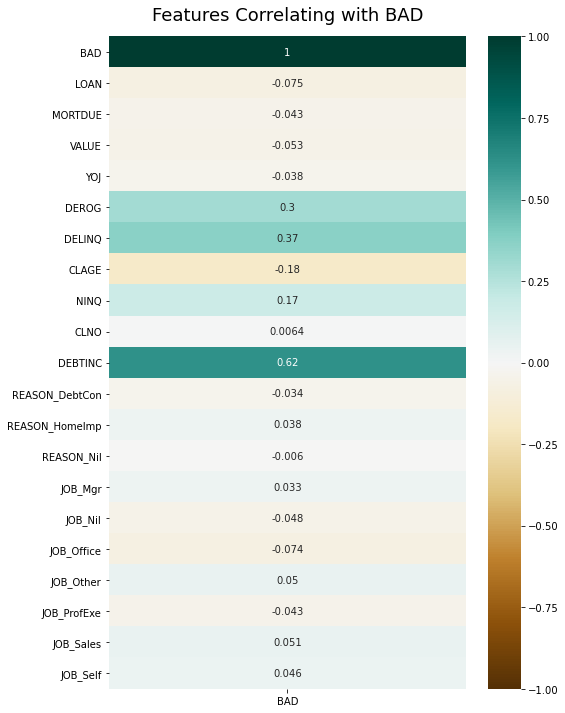

In [148]:
# create a sns heatmap to view the correlations of features with target feature - BAD

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dtf.corr()[['BAD']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with BAD', fontdict={'fontsize':18}, pad=16);

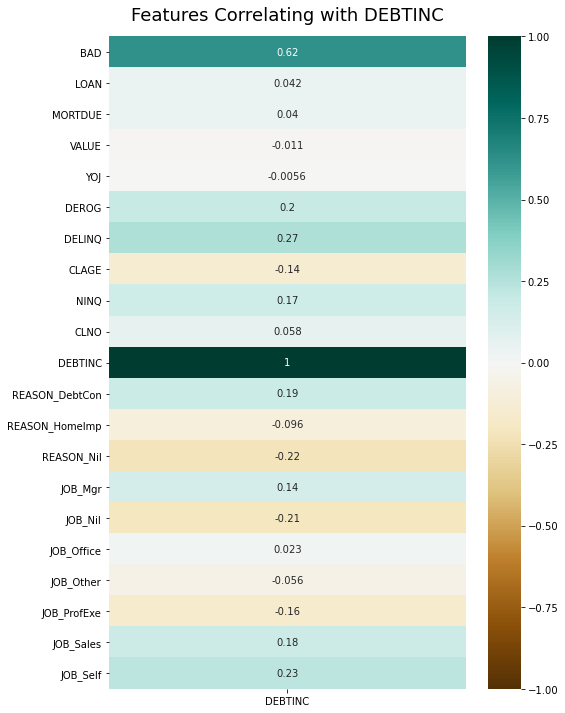

In [149]:
# create a sns heatmap to view the correlations of features with target feature - DEBTINC

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dtf.corr()[['DEBTINC']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with DEBTINC', fontdict={'fontsize':18}, pad=16);

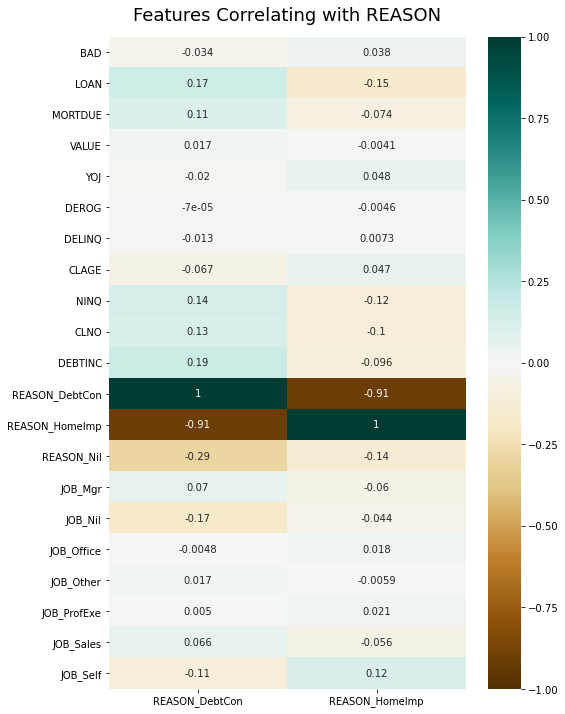

In [150]:
# create a sns heatmap to view the correlations of features with target feature - REASON

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dtf.corr()[['REASON_DebtCon','REASON_HomeImp']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with REASON', fontdict={'fontsize':18}, pad=16);

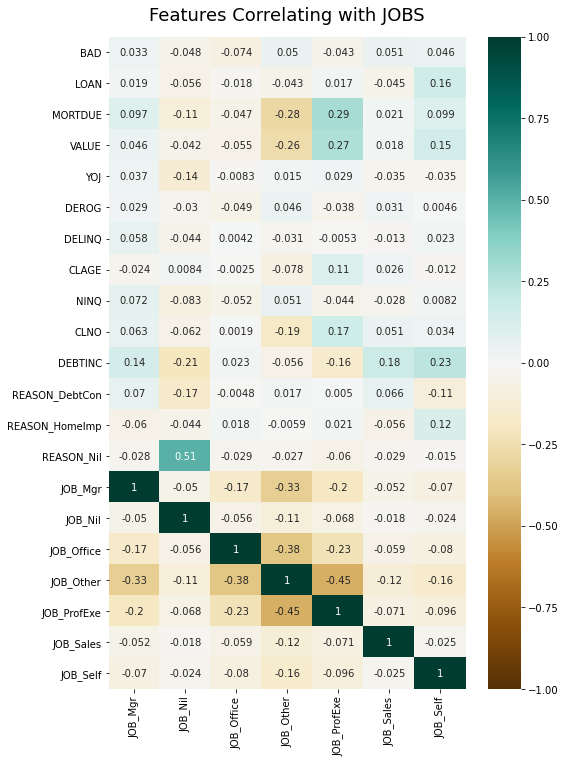

In [151]:
# create a sns heatmap to view the correlations of features with target feature - JOB

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dtf.corr()[['JOB_Mgr', 'JOB_Nil', 'JOB_Office', 'JOB_Other',
       'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with JOBS', fontdict={'fontsize':18}, pad=16);

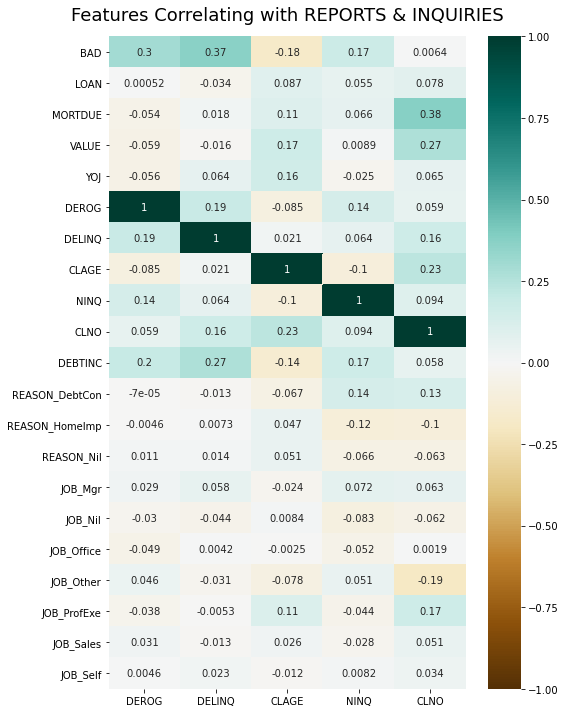

In [152]:
# create a sns heatmap to view the correlations of features with target feature - Reports & Inquiries

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dtf.corr()[['DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with REPORTS & INQUIRIES', fontdict={'fontsize':18}, pad=16);

In [153]:
dtf

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,REASON_DebtCon,REASON_HomeImp,REASON_Nil,JOB_Mgr,JOB_Nil,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,...,0,1,0,0,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,...,0,1,0,0,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,...,0,1,0,0,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,...,0,1,0,0,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,...,1,0,0,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,...,1,0,0,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,...,1,0,0,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,...,1,0,0,0,0,0,1,0,0,0


In [154]:
dtf.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp',
       'REASON_Nil', 'JOB_Mgr', 'JOB_Nil', 'JOB_Office', 'JOB_Other',
       'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

### Features Selection

In [155]:
## Target Variable - BAD

y = dtf['BAD']

In [156]:
## Features selected 

X = dtf[['DEROG', 'DELINQ','DEBTINC', 'REASON_DebtCon', 'YOJ','VALUE', 'CLNO']]

In [157]:
X

,DEROG,DELINQ,DEBTINC,REASON_DebtCon,YOJ,VALUE,CLNO
0,0.0,0.0,36.937607,0,10.5,39025.0,9.0
1,0.0,2.0,36.937607,0,7.0,68400.0,14.0
2,0.0,0.0,36.937607,0,4.0,16700.0,10.0
4,0.0,0.0,33.414808,0,3.0,112000.0,14.0
5,0.0,0.0,36.937607,0,9.0,40320.0,8.0
...,...,...,...,...,...,...,...
5955,0.0,0.0,33.962052,1,16.0,90185.0,16.0
5956,0.0,0.0,33.962052,1,16.0,92937.0,15.0
5957,0.0,0.0,33.962052,1,15.0,92924.0,15.0
5958,0.0,0.0,33.962052,1,14.0,91861.0,16.0


#### Features Preprocessing

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = scale.fit_transform(X)


### Train Test Data Split

In [158]:
x0_train, x0_test, y0_train, y0_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [159]:
#### Features Preprocessing

In [160]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = scale.fit_transform(x0_train)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(x, y0_train, test_size = 0.2, random_state = 2)

In [162]:
# helper function to show results and charts
def show_summary_report(actual, prediction, predict_proba):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, predict_proba)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, predict_proba)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

### Modelling

Model selection
- Decision Tree
- Random Forest
- Bagging
- Stacking



#### Decision Tree (#1)

In [214]:
clf=DecisionTreeClassifier(max_depth=4, random_state= 2)

In [215]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=2)

In [216]:
# predictions using train data

pred = clf.predict(X_train)
score = accuracy_score(y_train, pred)
print(score)


0.9939664218258132


##### Verify and Evaluate the Training Model

In [217]:
# Accuracy Score

pred_test = clf.predict(X_test)
score_test = accuracy_score(y_test, pred_test)
print(score_test)

0.9842767295597484


In [167]:
# Confusion matrix

import sklearn.metrics as metrics

cfm1= metrics.confusion_matrix(y_test, pred_test)
#print(cfm1)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm1_df = pd.DataFrame(cfm1,index=['NonDefault', 'Default'], columns=['pred_NonDefault','pred_Default'])
print("Confusion Matrix - Decision Tree Classifier\n", cfm1_df)


from sklearn.metrics import classification_report

print('\nReport :\n', classification_report(y_test, pred_test))

Confusion Matrix - Decision Tree Classifier
             pred_NonDefault  pred_Default
NonDefault              779            12
Default                   3           160

Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       791
           1       0.93      0.98      0.96       163

    accuracy                           0.98       954
   macro avg       0.96      0.98      0.97       954
weighted avg       0.98      0.98      0.98       954



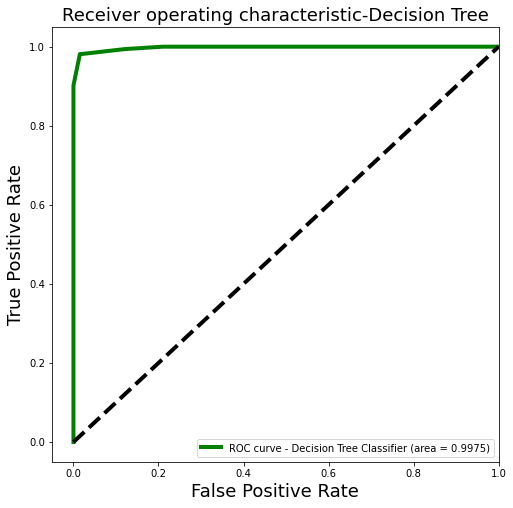

In [168]:
# ROC-AUC

# Get the predicted probability vector and explicitly name the columns
predictions = clf.predict_proba(X_test)

pred_probability_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])


from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
# Find fpr, tpr
preds_clf = pred_probability_df.iloc[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_clf)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (Donated)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='green', lw = 4, label = 'ROC curve - Decision Tree Classifier (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic-Decision Tree', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [169]:
from sklearn.metrics import mean_squared_error, r2_score

print('mse : ', mean_squared_error(y_test, pred_test))
print('r2 score : ', r2_score(y_test, pred_test))

mse :  0.015723270440251572
r2 score :  0.889012122575291


In [170]:
# Feature importance
importance = clf.feature_importances_

In [171]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00347
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.99519
Feature: 3, Score: 0.00133
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000


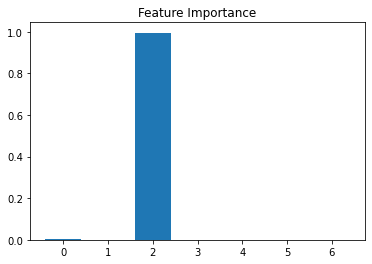

In [172]:
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
plt.show()

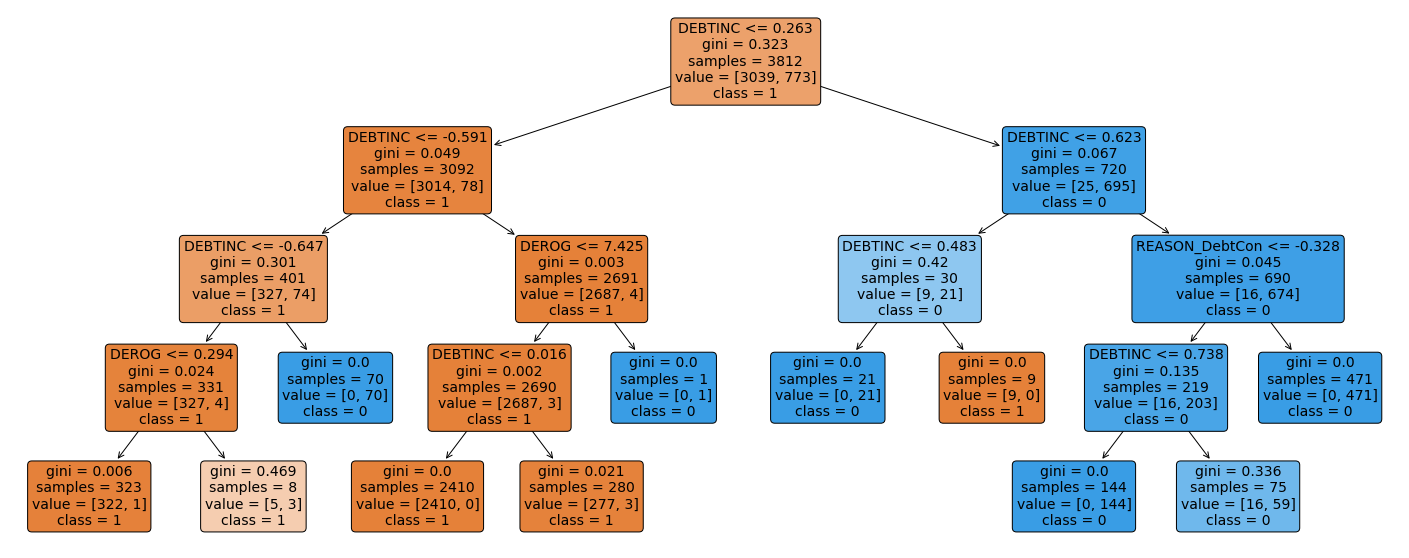

In [231]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns.to_list(), 
              class_names=y.unique().astype('U'), 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [206]:
feature = X.columns.to_list()
feature

['DEROG', 'DELINQ', 'DEBTINC', 'REASON_DebtCon', 'YOJ', 'VALUE', 'CLNO']

In [230]:
badclass = y.unique().astype('U')
badclass[0]

'1'

#### Random Forest (#2)

In [173]:
clf2 = RandomForestClassifier(max_depth=4, random_state = 0)

In [174]:
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [175]:
# predictions using train data

pred = clf2.predict(X_train)
score = accuracy_score(y_train, pred)
print(score)


0.9779643231899265


##### Verify and Evaluate the Training Model

In [176]:
# Accuracy Score

pred_test = clf2.predict(X_test)
score_test = accuracy_score(y_test, pred_test)
print(score_test)

0.9758909853249476


In [177]:
# Confusion matrix

import sklearn.metrics as metrics

cfm1= metrics.confusion_matrix(y_test, pred_test)
#print(cfm1)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm1_df = pd.DataFrame(cfm1,index=['NonDefault', 'Default'], columns=['pred_NonDefault','pred_Default'])
print("Confusion Matrix - Random Forest Classifier\n", cfm1_df)


from sklearn.metrics import classification_report

print('\nReport :\n', classification_report(y_test, pred_test))

Confusion Matrix - Random Forest Classifier
             pred_NonDefault  pred_Default
NonDefault              779            12
Default                  11           152

Report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       791
           1       0.93      0.93      0.93       163

    accuracy                           0.98       954
   macro avg       0.96      0.96      0.96       954
weighted avg       0.98      0.98      0.98       954



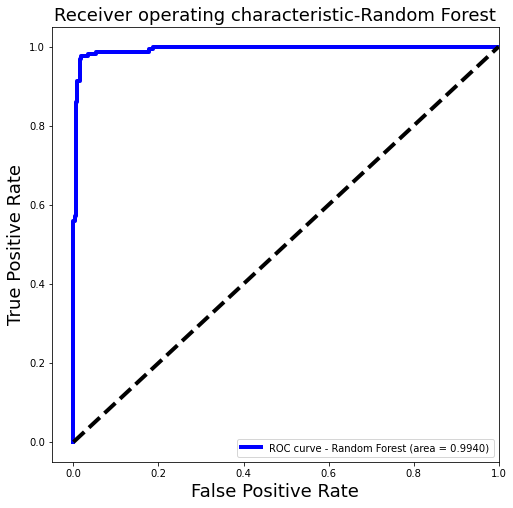

In [178]:
# ROC-AUC

# Get the predicted probability vector and explicitly name the columns
predictions = clf2.predict_proba(X_test)

pred_probability_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])


from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
# Find fpr, tpr
preds_clf = pred_probability_df.iloc[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_clf)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (Donated)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='blue', lw = 4, label = 'ROC curve - Random Forest (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic-Random Forest', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [179]:
from sklearn.metrics import mean_squared_error, r2_score

print('mse : ', mean_squared_error(y_test, pred_test))
print('r2 score : ', r2_score(y_test, pred_test))

mse :  0.02410901467505241
r2 score :  0.8298185879487796


In [180]:
# Feature importance
importance = clf2.feature_importances_
importance

array([0.08109031, 0.11276789, 0.74255972, 0.00466844, 0.00765722,
       0.03106845, 0.02018797])

In [181]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08109
Feature: 1, Score: 0.11277
Feature: 2, Score: 0.74256
Feature: 3, Score: 0.00467
Feature: 4, Score: 0.00766
Feature: 5, Score: 0.03107
Feature: 6, Score: 0.02019


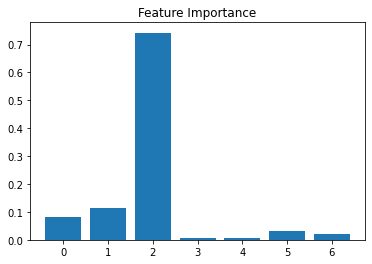

In [182]:
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
plt.show()

#### Bagging (#3)

In [183]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
bagging = BaggingClassifier(base_estimator = clf, n_estimators = 10, max_samples = 0.8, max_features = 0.8)

In [184]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=2),
                  max_features=0.8, max_samples=0.8)

In [185]:
# predictions using train data

pred = bagging.predict(X_train)
score = accuracy_score(y_train, pred)
print(score)


0.9729800629590766


##### Verify and Evaluate the Training Model

In [186]:
# Accuracy Score

pred_test = bagging.predict(X_test)
score_test = accuracy_score(y_test, pred_test)
print(score_test)

0.9727463312368972


In [187]:
# Confusion matrix

import sklearn.metrics as metrics

cfm1= metrics.confusion_matrix(y_test, pred_test)
#print(cfm1)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm1_df = pd.DataFrame(cfm1,index=['NonDefault', 'Default'], columns=['pred_NonDefault','pred_Default'])
print("Confusion Matrix - Bagging Ensemble\n", cfm1_df)


from sklearn.metrics import classification_report

print('\nReport :\n', classification_report(y_test, pred_test))

Confusion Matrix - Bagging Ensemble
             pred_NonDefault  pred_Default
NonDefault              776            15
Default                  11           152

Report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       791
           1       0.91      0.93      0.92       163

    accuracy                           0.97       954
   macro avg       0.95      0.96      0.95       954
weighted avg       0.97      0.97      0.97       954



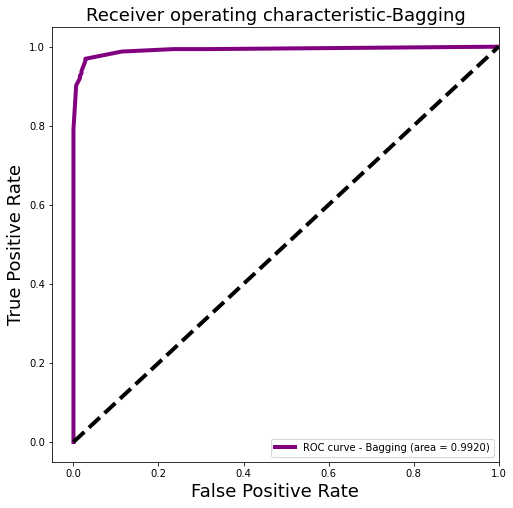

In [188]:
# ROC-AUC

# Get the predicted probability vector and explicitly name the columns
predictions = bagging.predict_proba(X_test)

pred_probability_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])


from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
# Find fpr, tpr
preds_clf = pred_probability_df.iloc[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_clf)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (Donated)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='purple', lw = 4, label = 'ROC curve - Bagging (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic-Bagging', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [189]:
from sklearn.metrics import mean_squared_error, r2_score

print('mse : ', mean_squared_error(y_test, pred_test))
print('r2 score : ', r2_score(y_test, pred_test))

mse :  0.027253668763102725
r2 score :  0.8076210124638378


Feature importance - NA
importance = bagging.feature_importances_
importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

#### Stacking (#4)

In [190]:
np.random.seed(0)
clfa = SVC(kernel = 'linear', C = 1, probability=True)
clfb = RandomForestClassifier(n_estimators = 10, random_state = 1)
clfc = GaussianNB()
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')
sclf = StackingClassifier(
    classifiers = [clfa, clfb, clfc],
    meta_classifier = lr)

In [191]:
sclf.fit(X_train, y_train)

StackingClassifier(classifiers=[SVC(C=1, kernel='linear', probability=True),
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=1),
                                GaussianNB()],
                   meta_classifier=LogisticRegression())

In [192]:
# predictions using train data

pred = sclf.predict(X_train)
score = accuracy_score(y_train, pred)
print(score)


1.0


##### Verify and Evaluate the Training Model

In [193]:
# Accuracy Score

pred_test = sclf.predict(X_test)
score_test = accuracy_score(y_test, pred_test)
print(score_test)

0.9926624737945493


In [194]:
# Confusion matrix

import sklearn.metrics as metrics

cfm1= metrics.confusion_matrix(y_test, pred_test)
#print(cfm1)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm1_df = pd.DataFrame(cfm1,index=['NonDefault', 'Default'], columns=['pred_NonDefault','pred_Default'])
print("Confusion Matrix - Bagging Ensemble\n", cfm1_df)


from sklearn.metrics import classification_report

print('\nReport :\n', classification_report(y_test, pred_test))

Confusion Matrix - Bagging Ensemble
             pred_NonDefault  pred_Default
NonDefault              787             4
Default                   3           160

Report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       791
           1       0.98      0.98      0.98       163

    accuracy                           0.99       954
   macro avg       0.99      0.99      0.99       954
weighted avg       0.99      0.99      0.99       954



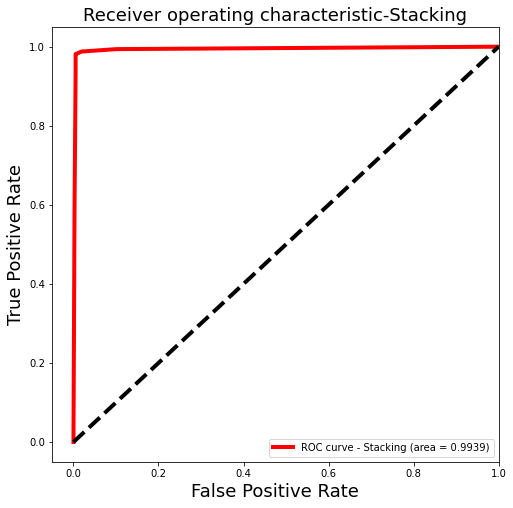

In [195]:
# ROC-AUC

# Get the predicted probability vector and explicitly name the columns
predictions = sclf.predict_proba(X_test)

pred_probability_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])


from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
# Find fpr, tpr
preds_clf = pred_probability_df.iloc[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_clf)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (Donated)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='red', lw = 4, label = 'ROC curve - Stacking (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic-Stacking', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [196]:
from sklearn.metrics import mean_squared_error, r2_score

print('mse : ', mean_squared_error(y_test, pred_test))
print('r2 score : ', r2_score(y_test, pred_test))

mse :  0.007337526205450734
r2 score :  0.9482056572018025


#Feature importance - NA
importance = sclf.feature_importances_
importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [197]:
label = ['SVC', 'Random Forest', 'Naïve Bayes', 'Stacking Classifier']
clf_list = [clfa, clfb, clfc, sclf]
    
#fig = plt.figure(figsize = (10, 8))
#gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

clf_cv_mean = []
clf_cv_std = []

value = 1.5
width = 0.75

for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_train, y_train, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X_train, y_train)
    #ax = plt.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X = newX, y = y, clf = clf)
                                #filler_feature_values={2: value},
                                #filler_feature_ranges={2:width})
    #plt.title(label)

#plt.show()


# ,3: value,4: value,5: value,6: value
# ,3:width,4:width,5:width,6:width

Accuracy: 0.97 (+/- 0.01) [SVC]
Accuracy: 0.99 (+/- 0.00) [Random Forest]
Accuracy: 0.86 (+/- 0.00) [Naïve Bayes]
Accuracy: 0.99 (+/- 0.00) [Stacking Classifier]


#######plot learning curves
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size = 0.3, random_state = 33)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()

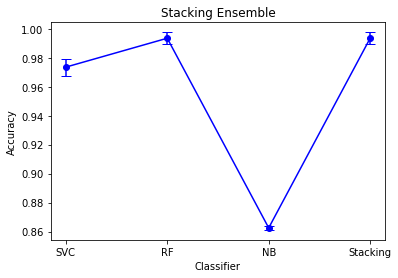

In [198]:
# plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(
    range(4),
    clf_cv_mean,
    yerr = clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                

plt.title('Stacking Ensemble')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.xticks(range(4), ['SVC', 'RF', 'NB', 'Stacking'])     
plt.show()

### Testing

In [199]:
custs = pd.read_csv('hmeq_pred.csv')
custs.info()

FileNotFoundError: [Errno 2] No such file or directory: 'hmeq_pred.csv'

In [ ]:
custs

In [ ]:
# clean obs#2
# Fillna with 0 values as follow
custs['MORTDUE'].fillna(0, inplace = True)
custs['DEROG'].fillna(0, inplace = True)
custs['DELINQ'].fillna(0, inplace = True)
custs

In [ ]:
# change feature REASON to binary
cases = pd.get_dummies(custs)
cases

In [ ]:
X_cases = cases[['DEROG', 'DELINQ','DEBTINC', 'REASON_DebtCon', 'YOJ','VALUE', 'CLNO']]

In [ ]:
results_stacking = sclf.predict(X_cases)

In [ ]:
results_stacking

In [ ]:
results_dt = clf.predict(X_cases)

In [ ]:
results_dt

In [ ]:
results_bag = bagging.predict(X_cases)

In [ ]:
results_bag

In [ ]:
results_rf = clf2.predict(X_cases)

In [ ]:
results_rf